# Setup (importing modules)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy=True

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../Data/Apartment_rental_df_prepared.csv')

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,occupation,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,buying_price,pdi_sol
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,01_One,0-3,1,48-744,50,178430.0,5.032039
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,01_One,0-3,1,5-48,50,79345.0,3.521406
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,03_Three,5-16,3-24,1-4,90,257355.0,3.226963
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,01_One,0-3,1,5-48,50,168945.0,0.591065
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,01_One,0-3,1,48-744,50,142975.0,3.200942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro,29.0,1,01_One,0-3,1,1-4,50,168945.0,1.333715
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro,29.0,1,01_One,0-3,1,1-4,50,168945.0,1.332195
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro,29.0,1,01_One,0-3,1,1-4,50,168945.0,1.342319
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN,6114,Salamanca,29.0,1,01_One,0-3,1,1-4,50,213990.0,1.398097


# Analysis

## About Prices

### What is the mean price?

In [5]:
df.total_price.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: total_price, dtype: float64

The maximum value could potentially introduce bias, so it would be advisable to use the median renting price as the representative measure.

In [6]:
df.total_price.median()

70.0

### What is the mean price per district?

In [7]:
df.groupby('district').total_price.median().sort_values(ascending = False)

district
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: total_price, dtype: float64

We would expect 'Salamanca' or 'Centro' to have the most expensive properties. However, the 'San Blas - Canillejas,' properties exhibit higher rental prices.

In [8]:
df.loc[df.district == 'San Blas - Canillejas'].sort_values('total_price',ascending = False).head(10)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,occupation,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,buying_price,pdi_sol
9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,03_Three,5-16,3-24,1-4,90,163233.0,7.532233
9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,02_Two,4,2,1-4,70,126959.0,7.439364
10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,04_Four or more,5-16,3-24,1-4,120,217644.0,8.212429
9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,02_Two,5-16,2,1-4,70,126959.0,8.391922
9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,04_Four or more,5-16,3-24,1-4,150,272055.0,7.714952
9748,34882596,2 rooms near wanda,38951538,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,1500,1,2,363,2 rooms near Wanda stadium (20' walking) with ...,f,4,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,02_Two,4,3-24,1-4,70,126959.0,7.548577
9173,34522997,Beautiful Penthouse next to Wanda Metropolitano,260551569,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,2000,1,1,0,Wonderful penthouse in a lovely duplex next to...,f,4,1.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,100,01_One,4,2,1-4,50,90685.0,8.138310
9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,03_Three,5-16,2,1-4,90,163233.0,7.557076
10092,35091283,FINAL CHAMPIONS LEAGUE,264225539,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,1000,1,1,180,"Desayuno, comida y cena incluida. Traslados al...",f,6,2.0,6.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,50,02_Two,5-16,3-24,1-4,70,126959.0,10.334061
10404,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,NaN,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Two,0-3,3-24,1-4,70,126959.0,8.610212


Examining the 'name' variable, it becomes evident that most of the properties are named after the 'Champions League' because this area is in proximity to the 'Estadio Civitas Metropolitano' soccer stadium.

**Insight 1: Some properties may have a moderate base price but experience increased demand and higher prices during sports events or shows throughout the year.***

### What factors, aside from location, are implicated in the price of a property?

To respond to this question, it would be necessary to build a minicube.

In [9]:
# Selecting the metrics and the dimensions
metrics = ['total_price','buying_price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]
minicube_price

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,total_price,buying_price
0,01_One,0-3,1,48-744,60.0,178430.0
1,01_One,0-3,1,5-48,31.0,79345.0
2,03_Three,5-16,3-24,1-4,50.0,257355.0
3,01_One,0-3,1,5-48,92.0,168945.0
4,01_One,0-3,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17705,01_One,0-3,1,1-4,29.0,168945.0
17706,01_One,0-3,1,1-4,29.0,168945.0
17707,01_One,0-3,1,1-4,29.0,168945.0
17708,01_One,0-3,1,1-4,29.0,213990.0


In [10]:
# Make the dimensions transactional
minicube_price = minicube_price.melt(id_vars=['total_price','buying_price'])
minicube_price

,total_price,buying_price,variable,value
0,60.0,178430.0,bedrooms_disc,01_One
1,31.0,79345.0,bedrooms_disc,01_One
2,50.0,257355.0,bedrooms_disc,03_Three
3,92.0,168945.0,bedrooms_disc,01_One
4,26.0,142975.0,bedrooms_disc,01_One
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,1-4
70836,29.0,168945.0,number_of_reviews_disc,1-4
70837,29.0,168945.0,number_of_reviews_disc,1-4
70838,29.0,213990.0,number_of_reviews_disc,1-4


In [11]:
# Apply the desired aggregation functions to the metrics by 'variable' and 'value'
minicube_price = minicube_price.groupby(['variable','value'])[['total_price','buying_price']].agg('median')
minicube_price

total_price  buying_price
variable               value                                     
accommodates_disc      0-3                     50.0      168945.0
                       4                       86.0      168945.0
                       5-16                   126.0      236523.0
bedrooms_disc          01_One                  56.0      168945.0
                       02_Two                 100.0      236523.0
                       03_Three               140.0      304101.0
                       04_Four or more        204.0      405468.0
beds_disc              1                       59.0      168945.0
                       2                      100.0      236523.0
                       3-24                   139.0      257355.0
number_of_reviews_disc 1-4                     70.0      168945.0
                       48-744                  68.0      168945.0
                       5-48                    69.0      168945.0

Analyzing each variable using the minicube 

In [12]:
minicube_price.loc['bedrooms_disc']

,total_price,buying_price
value,,
01_One,56.0,168945.0
02_Two,100.0,236523.0
03_Three,140.0,304101.0
04_Four or more,204.0,405468.0


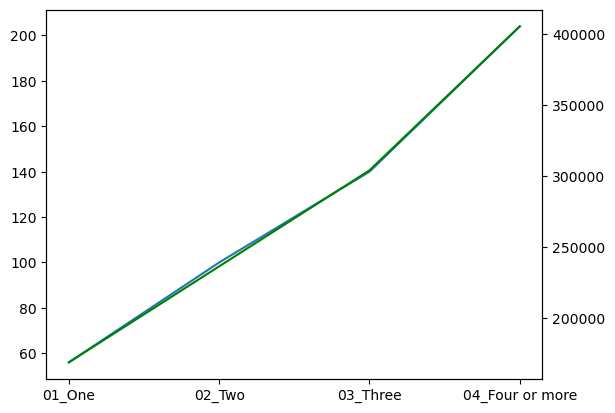

In [13]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['bedrooms_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['bedrooms_disc'].buying_price,color = 'green');

There exists an almost perfect correlation between the buying price of the property and the total price to rent. However, this correlation may be artificial because both the total price and the buying price were derived from the number of bedrooms.

In [14]:
minicube_price.loc['beds_disc']

,total_price,buying_price
value,,
1,59.0,168945.0
2,100.0,236523.0
3-24,139.0,257355.0


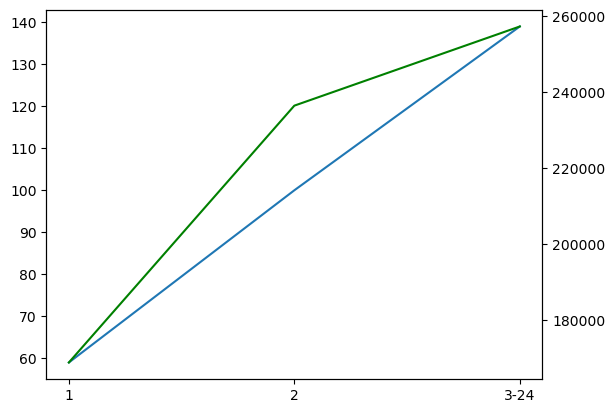

In [15]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['beds_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['beds_disc'].buying_price,color = 'green');

**Insight 2: The number of beds to avoid is 2. There are more expensive than the other properties based on the number of beds**

Analyzing by the number of guests they accept.

In [16]:
minicube_price.loc['accommodates_disc']

,total_price,buying_price
value,,
0-3,50.0,168945.0
4,86.0,168945.0
5-16,126.0,236523.0


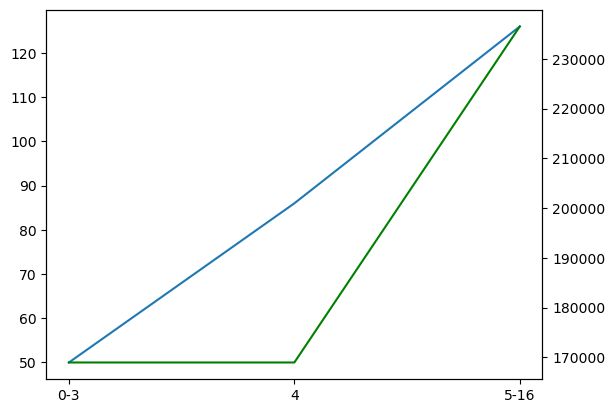

In [17]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['accommodates_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_disc'].buying_price,color = 'green');

**Insight 3: The optimal number of guests is 3, as the price of properties to accommodate 3 is the same as accommodating 1 or 2. Beyond 4, the floor space needs to be larger, and the purchase price increases significantly.**

### Analyzing the proximity to the key location ('La Puerta del Sol') and the effect on the price of the apartments.

Selecting the nearest districts to 'La Puerta del Sol' 

In [18]:
df.groupby('district').pdi_sol.median().sort_values()

district
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

Setting a cut-off point up to 'Latina'.

In [19]:
df.groupby('district').pdi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

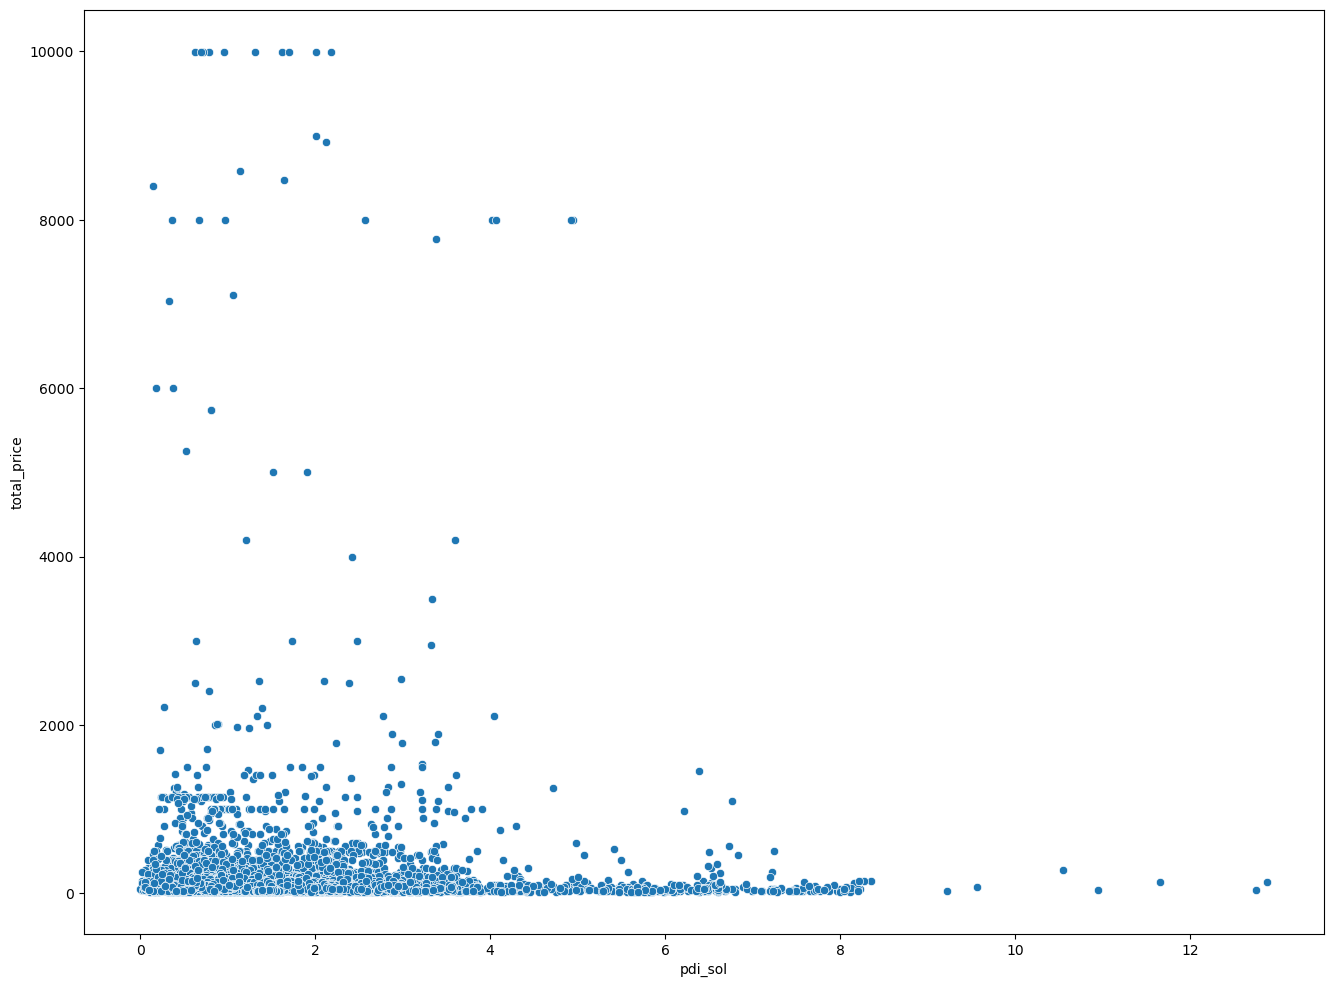

In [20]:
selection = df.groupby('district').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.district.isin(selection)], x = 'pdi_sol', y = 'total_price');

**Insight 4: It appears that proximity to points of interest doesn't have as much impact as it would be expected. This opens the door to search for properties in a central district that are not right next to the Point of Interest (Puerta del Sol), and therefore, they are expected to have a lower purchase price.**

## About Occupation

### What is the mean occupation rate per district?

Selecting the top 5 districts with a high occupancy rate.

In [63]:
df.groupby('district').occupation.mean().sort_values(ascending = False).head(5)

district
Arganzuela    64.211940
Chamberí      59.513315
Barajas       59.450704
Moratalaz     59.351064
Salamanca     59.261084
Name: occupation, dtype: float64

### Is there a relationship between the occupancy rate and the proximity to popular location ('La Puerta del Sol')? 

Sorting districts by occupation rate, by the distance to 'La Puerta del Sol', and by the renting price.

In [70]:
(df.groupby('district')[['occupation', 'pdi_sol']].mean()
    .sort_values(by = 'occupation', ascending = False))

,occupation,pdi_sol,buying_price
district,,,
Arganzuela,64.211940,1.939114,165708.736318
Chamberí,59.513315,2.133167,223269.499541
Barajas,59.450704,11.439064,135279.683099
Moratalaz,59.351064,5.073901,108351.063830
Salamanca,59.261084,2.715975,261566.758621
Retiro,58.315534,2.450593,208742.854369
Ciudad Lineal,58.007519,5.231293,118064.210526
Moncloa - Aravaca,57.667343,3.294526,167381.770791
Centro,57.128830,0.730611,198908.987080


**Insight 5: There is not a strong correlation between the occupancy rate and the proximity to 'La Puerta del Sol' as 'Barajas' is located too far from the key location. However, this district could be a key point due to the proximity to the Madrid Airport and its high occupancy rate.** 

## Geographic Analysis 

In order to do this kind of analysis, it is necessary to import a package called 'folium'.

In [24]:
import folium

In [25]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

In [26]:
data = df[df.district == 'San Blas - Canillejas'].copy()

To represent the markers of all the properties, we need to create a loop to add them to the map.

In [27]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(data)):
   folium.Marker(
      location = [data.iloc[piso]['latitude'], data.iloc[piso]['longitude']],
      popup = data.iloc[piso]['total_price'],
   ).add_to(mapa)

mapa

Creating a color code that visually indicates the price range in the map. To do this, we will create a new discretized variable and change the marker to a colored circle.

In [28]:
data['total_price_disc'] = pd.qcut(data['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [29]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(data)):
   folium.CircleMarker(
      location = [data.iloc[piso]['latitude'], data.iloc[piso]['longitude']],
      popup = data.iloc[piso]['total_price'],
      fill=True,
      color = data.iloc[piso]['total_price_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

**Insight 6: There are still many yellow and orange points, which may indicate that there is still potential to further exploit the factor of sporting events. These yellow and orange points refer to properties with low costs, which can potentially offer a better profit margin.**

# Insights

**Insight 1:** 
Some properties may have a moderate base price but experience increased demand and higher prices during sports events or shows throughout the year.

**Insight 2:**
The number of beds to avoid is 2. There are more expensive than the other properties based on the number of beds.

**Insight 3:** 
The optimal number of guests is 3, as the price of properties to accommodate 3 is the same as accommodating 1 or 2. Beyond 4, the floor space needs to be larger, and the purchase price increases significantly.

**Insight 4:** 
It appears that proximity to points of interest doesn't have as much impact as it would be expected. This opens the door to search for properties in a central district that are not right next to the Point of Interest (Puerta del Sol), and therefore, they are expected to have a lower purchase price.

**Insight 5:** 
There is not a strong correlation between the occupancy rate and the proximity to 'La Puerta del Sol' as 'Barajas' is located too far from the key location. However, this district could be a key point due to the proximity to the Madrid Airport and its high occupancy rate. 

**Insight 6:** 
There are still many yellow and orange points, which may indicate that there is still potential to further exploit the factor of sporting events. These yellow and orange points refer to properties with low costs, which can potentially offer a better profit margin.